## SealOrNoSeal

This program is designed to use image filters to detect the presence of sea lions 
on the beaches in Alaska. 

By using various filters and colour maps, we can highlight the seals on the beach and subtract 
background colours from sample images with no seals present. 

The aim of this program is to help process the thousands of images collected from remote automated cameras 
and shortlist the images that are likely to contain seals for further processing. 

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import skimage as sk
from skimage import data
from skimage.color import rgb2hed
from skimage.color import rgb2hsv
from skimage.color import rgb2lab
from matplotlib.colors import LinearSegmentedColormap

In [19]:
cmap_n = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])

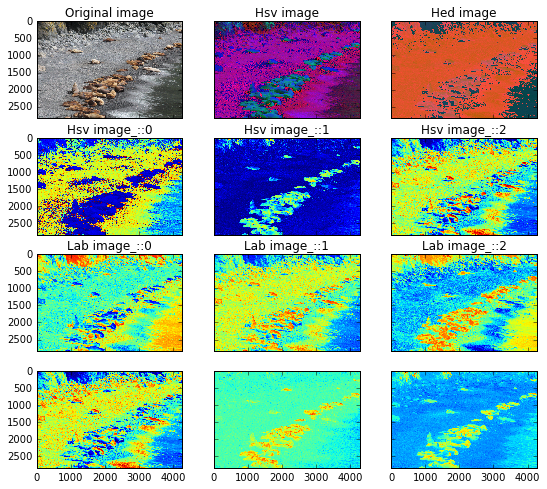

In [21]:
# Read in test images:

seal_img = sk.io.imread("sealtest.jpg")
background_img=sk.io.imread("fake_no_sealtest.jpg")

# Convert color maps (hsv - hue saturation value/brightness)
seal_hsv = rgb2hsv(seal_img)
seal_hed = rgb2hed(seal_img)
seal_lab = rgb2lab(seal_img)

# A quick look at color manipulations of certain channels. 
fig, axes = plt.subplots(4, 3, figsize=(9, 8), sharex=True, sharey=True,
            subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(seal_img); ax[0].set_title("Original image")
ax[1].imshow(seal_hsv); ax[1].set_title("Hsv image")
ax[2].imshow(seal_hed); ax[2].set_title("Hed image")

ax[3].imshow(seal_hsv[:,:,0]); ax[3].set_title("Hsv image_::0")
ax[4].imshow(seal_hsv[:,:,1]); ax[4].set_title("Hsv image_::1")
ax[5].imshow(seal_hsv[:,:,2]); ax[5].set_title("Hsv image_::2")
ax[6].imshow(seal_hed[:,:,0]); ax[6].set_title("Hed image_::0")
ax[7].imshow(seal_hed[:,:,1]); ax[7].set_title("Hed image_::1")
ax[8].imshow(seal_hed[:,:,2]); ax[8].set_title("Hed image_::2")
ax[9].imshow(seal_lab[:,:,0]); ax[6].set_title("Lab image_::0")
ax[10].imshow(seal_lab[:,:,1]); ax[7].set_title("Lab image_::1")
ax[11].imshow(seal_lab[:,:,2]); ax[8].set_title("Lab image_::2")



So looking above, the middle hsv image shows good differentiation in the saturation channel. 


In [46]:
import numpy as np

from skimage.exposure import rescale_intensity

s1 = rescale_intensity(seal_hsv[:, :, 1], out_range=(0, 1))
s4 = rescale_intensity(seal_lab[:, :, 1], out_range=(0, 1))


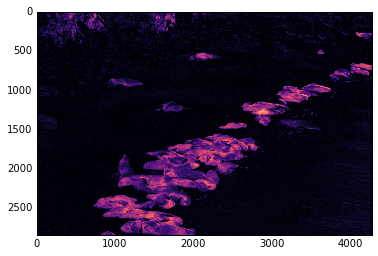

In [52]:


#plt.imshow(seal_lab[:,:,1] * seal_hsv[:,:,1],cmap="magma")
#plt.imshow(seal_lab[:,:,1] * seal_hsv[:,:,1],cmap="magma")
plt.imshow(s1*s4,cmap="magma")
